# Lab | Cleaning numerical data

### 1. Import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Load the `we_fn_use_c_marketing_customer_value_analysis.csv` into the variable `customer_df`

In [2]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

### 3. First look at its main features (head, shape, info).

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

### 4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [6]:
n_cols = []
for i in range(len(customer_df.columns)):
    n_cols.append(customer_df.columns[i].lower().replace(' ', '_'))
customer_df.columns = n_cols

customer_df = customer_df.rename(columns = {'employmentstatus':'employment_status'})

print(customer_df.columns)

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')


### 5. Change `effective to date` column to datetime format.

In [7]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors='coerce')

In [8]:
type(customer_df['effective_to_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

### 6. Define a function that differentiates between continuous and discrete variables.   
**Hint:** The number of unique values might be useful. Store continuous data into a `continuous_df` variable and do the same for `discrete_df`

We think that **float** data type more suitable for column `income` instead of **integer**. So, we converted it.

In [9]:
customer_df['income'] = customer_df['income'].astype(float)
type(customer_df['income'][0])

numpy.float64

In [10]:
def filtering(x):
    discrete_df = customer_df.select_dtypes('int64')
    continuous_df = customer_df.select_dtypes('float64')
    return discrete_df, continuous_df

discrete_df, continuous_df = filtering(customer_df)

In [11]:
discrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   monthly_premium_auto           9134 non-null   int64
 1   months_since_last_claim        9134 non-null   int64
 2   months_since_policy_inception  9134 non-null   int64
 3   number_of_open_complaints      9134 non-null   int64
 4   number_of_policies             9134 non-null   int64
dtypes: int64(5)
memory usage: 356.9 KB


In [12]:
continuous_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_lifetime_value  9134 non-null   float64
 1   income                   9134 non-null   float64
 2   total_claim_amount       9134 non-null   float64
dtypes: float64(3)
memory usage: 214.2 KB


### 7. Plot a correlation matrix, comment what you see.

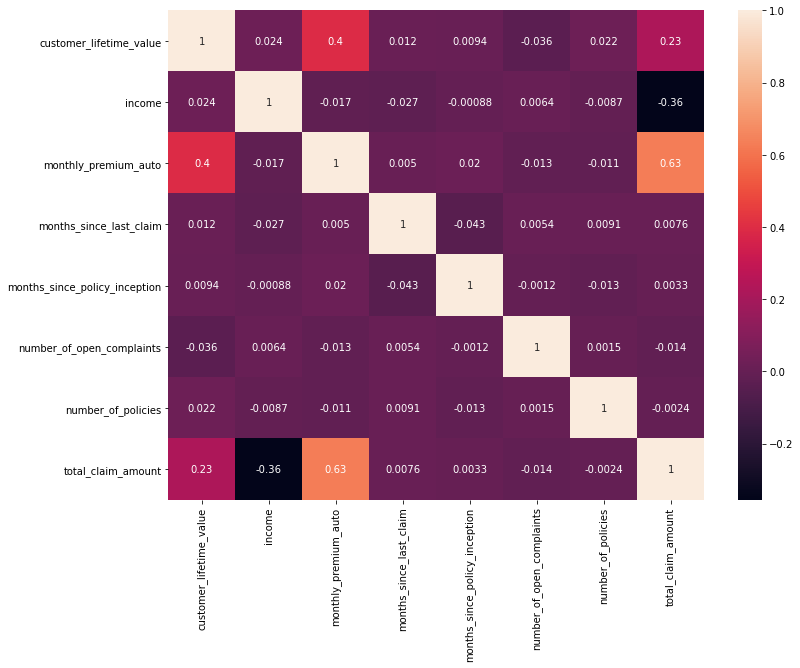

In [13]:
plt.figure(figsize=(12, 9))
correlations_matrix = customer_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

We don't see multicollinearity. We don't need to remove columns.

### 8. Create a function to plot every discrete variable.  Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)   

- Discrete variable

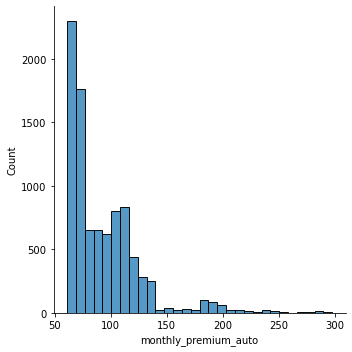

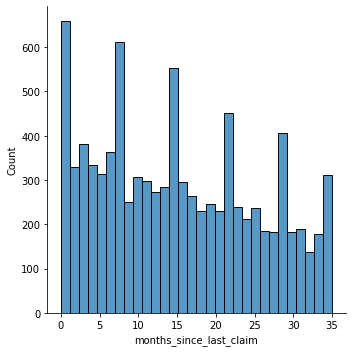

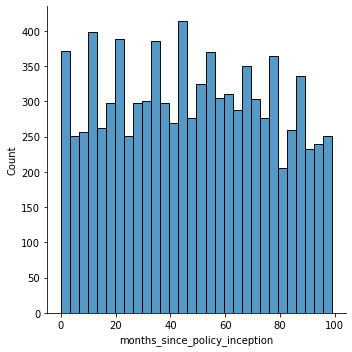

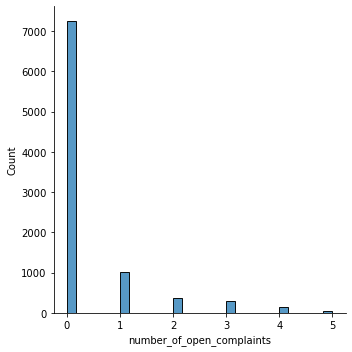

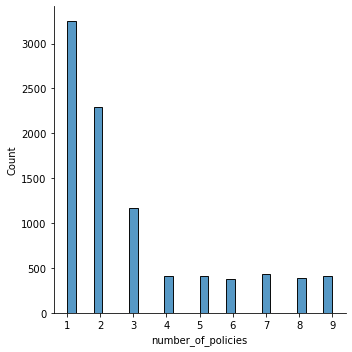

In [14]:
for i in discrete_df.columns:
    sns.displot(x = i, data = discrete_df, bins=30)
    plt.show()

- Continuous variables 

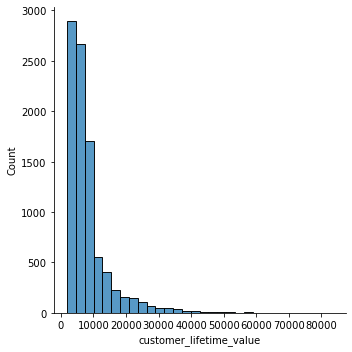

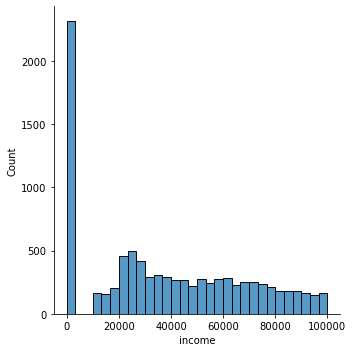

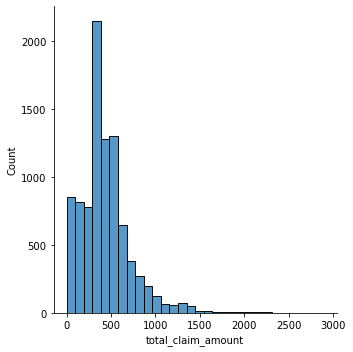

In [15]:
for i in continuous_df.columns:
    sns.displot(x = i, data = continuous_df, bins=30)
    plt.show()

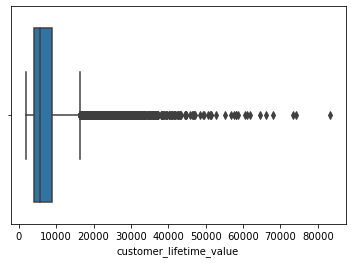

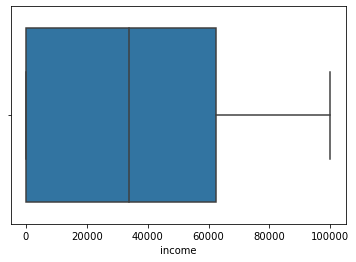

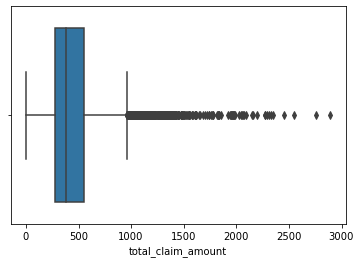

In [16]:
for i in continuous_df.columns:
    sns.boxplot(x = i, data = continuous_df)
    plt.show()

### 9 .Comment what you can see in the plots.

We have outliers in continuous columns `customer_lifetime_value` and `total_claim_amount`

### 10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)   
Good type of plot for this it's **boxplot**   

### 11 . Did you find outliers?  Comment what you will do with them.

Yes, we have outliers. And depends on our goal and data in columns we are goung to use different methods to remove it. Right now I dicaded do nothing with outliers.

### 12. Check all columns for NaN values.  Decide what (if anything) you will need to do with them.

In [17]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [18]:
customer_df.to_csv('files_for_lab/1step_we_fn_use_c_marketing_customer_value_analysis.csv', index=False)

# Lab | Cleaning categorical data

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

customer_df = pd.read_csv('files_for_lab/1step_we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head(3)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274.0,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0.0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767.0,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize


### 2. Find  all of the categorical data.  Save it in a `categorical_df` variable.

In [20]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors='coerce')

In [21]:
def filtering_categorical(data):
    categorical_df = data.select_dtypes('object')
    return categorical_df

categorical_df = filtering_categorical(customer_df)
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer           9134 non-null   object
 1   state              9134 non-null   object
 2   response           9134 non-null   object
 3   coverage           9134 non-null   object
 4   education          9134 non-null   object
 5   employment_status  9134 non-null   object
 6   gender             9134 non-null   object
 7   location_code      9134 non-null   object
 8   marital_status     9134 non-null   object
 9   policy_type        9134 non-null   object
 10  policy             9134 non-null   object
 11  renew_offer_type   9134 non-null   object
 12  sales_channel      9134 non-null   object
 13  vehicle_class      9134 non-null   object
 14  vehicle_size       9134 non-null   object
dtypes: object(15)
memory usage: 1.0+ MB


### 3. Check for NaN values.

In [22]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

### 4. Check all unique values of columns.

In [23]:
for col in categorical_df:
    print(categorical_df[col].value_counts(), '\n')

KX80728    1
DP84567    1
TV75816    1
JQ59145    1
XK11432    1
          ..
WA97671    1
KC71643    1
OS39723    1
DF62718    1
LQ28707    1
Name: customer, Length: 9134, dtype: int64 

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64 

No     7826
Yes    1308
Name: response, dtype: int64 

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64 

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64 

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employment_status, dtype: int64 

F    4658
M    4476
Name: gender, dtype: int64 

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64 

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64 

P

### 5. Check dtypes. Do they all make sense as categorical data?

In [24]:
categorical_df.dtypes

customer             object
state                object
response             object
coverage             object
education            object
employment_status    object
gender               object
location_code        object
marital_status       object
policy_type          object
policy               object
renew_offer_type     object
sales_channel        object
vehicle_class        object
vehicle_size         object
dtype: object

In [25]:
categorical_df.head(3)

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize


We can change response column to boolean data type, but I think, it's not really necessary.

### 6. Does any column contain alpha and numeric data?  Decide how to clean it.   

In [26]:
categorical_df['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [27]:
categorical_df['renew_offer_type'].value_counts()

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

**Answers:**   
We have 3 columns with included alpha and numeric data: `customer`, `policy` and `renew_offer_type`.   
- `customer` I will delete it later.
-  `policy` I remove it because this column contains the same information as the `policy_type` column.
- `renew_offer_type` I decided not to do anything with this column, because it simply describes the type of offer, and it doesn't really matter what it's called.

### 7. Would you choose to do anything else to clean or wrangle the categorical data?  Comment your decisions.

**Answers:**   
For this step I don't see that we have to do anything else with categorical data. Only combined some subcategories in columns.

### 8. Compare `policy_type` and `policy`.  What information is contained in these columns.  Can you identify what is important?  

In [30]:
categorical_df['policy_type'].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [31]:
categorical_df['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

As I noted above, we don't need both of these columns. Because they contained the same information, only the `policy` column contained more detailed information. Of these two, I decided to remove the `policy` column.

In [32]:
customer_df = customer_df.drop('policy',axis = 1)
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employment_status              9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   float64       
 10  location_code                  9134 non-null   object        
 11  marital_status   

### 9. Check number of unique values in each column, can they be combined in any way to ease encoding?  Comment your thoughts and make those changes.

- Column `employment_status`   
Combine the values: _Medical Leave_, _Disabled_ and _Retired_ with _Unemployed_ value. Because these values have the same meaning. 


- Column `education`   
Combine the values: _Master_ and _Doctor_ in a new sub-category _High-level-degree_.


- Column `vehicle_class`   
Create a new sub-category _Luxury-Sport_ that will include the old values: _Sports Car_, _Luxury SUV_, _Luxury Car_.

In [33]:
customer_df['employment_status'] = np.where(customer_df['employment_status'].isin(['Medical Leave','Disabled','Retired']) , 'Unemployed', customer_df['employment_status'])
customer_df['employment_status'].value_counts()

Employed      5698
Unemployed    3436
Name: employment_status, dtype: int64

In [34]:
def education(x):
    if x in ['Master', 'Doctor']:
        return 'High-level-degree'
    else:
        return x
    
customer_df['education'] = customer_df['education'].apply(education)
customer_df['education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
High-level-degree       1083
Name: education, dtype: int64

In [35]:
def vehicle_class(x):
    if x in ['Sports Car', 'Luxury SUV', 'Luxury Car']:
        return 'Luxury-Sport'
    else:
        return x
    
customer_df['vehicle_class'] = customer_df['vehicle_class'].apply(vehicle_class)
customer_df['vehicle_class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Luxury-Sport      831
Name: vehicle_class, dtype: int64

### Save new data

In [36]:
customer_df.to_csv('files_for_lab/2step_we_fn_use_c_marketing_customer_value_analysis.csv', index=False)